# I. Introduction and Load DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, confusion_matrix, classification_report
import warnings    
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

import lime
import lime.lime_tabular

from sklearn.naive_bayes import GaussianNB
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

#smote - Tạo thêm dữ liệu để cân bằng 
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import unidecode
import pgeocode
from word2number import w2n
pd.set_option('display.max_rows', None)  # Hiển thị tất cả các hàng
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [2]:
# Your task 

In [3]:
df = pd.read_csv('C:\\Users\\namqt\\05.Project\\ParisHousing.csv')

In [4]:
df.head()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard


In [5]:
df.describe()

,Unnamed: 0,squareMeters,floors,cityCode,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,4999.50000,49870.13120,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,2886.89568,28774.37535,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,0.00000,89.00000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,2499.75000,25098.50000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,4999.50000,50105.50000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,7499.25000,74609.75000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,9999.00000,99999.00000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   squareMeters       10000 non-null  int64  
 2   numberOfRooms      10000 non-null  object 
 3   floors             10000 non-null  int64  
 4   cityCode           10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  bool   
 9   hasStormProtector  10000 non-null  bool   
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  bool   
 14  hasGuestRoom       10000 non-null  int64  
 15  price              10000 non-null  float64
 16  category           1000

In [7]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [8]:
df.head(3)

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard


# II. Data understanding & Data Preparation

In [9]:
#No null values

In [10]:
#no negative values

In [11]:
df.drop(columns = 'cityCode', inplace = True)

In [12]:
df

,squareMeters,numberOfRooms,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,three,63,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,80771,thirty-nine,98,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,55712,fifty-eight,19,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,32316,forty-seven,6,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,70429,nineteen,90,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,eighty-nine,5,7,6,2009,False,True,9311,1698,218,False,4,176425.9,Basic,has pool and no yard
9996,44403,twenty-nine,12,9,4,1990,False,True,9061,1742,230,False,0,4448474.0,Basic,has pool and has yard
9997,83841,three,69,10,10,2005,True,True,8304,7730,345,True,9,8390030.5,Basic,no pool and no yard
9998,59036,seventy,96,1,3,2010,False,True,2590,6174,339,True,4,5905107.0,Basic,no pool and no yard


In [13]:
df.columns = df.columns.str.lower()

In [14]:
def words_to_number(word):
    try:
        return w2n.word_to_num(word)
    except ValueError:
        return None
df['numberofrooms'] =  df['numberofrooms'].apply(words_to_number)

## 2.1. Numerical_feature

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   floors             10000 non-null  int64  
 3   citypartrange      10000 non-null  int64  
 4   numprevowners      10000 non-null  int64  
 5   made               10000 non-null  int64  
 6   isnewbuilt         10000 non-null  bool   
 7   hasstormprotector  10000 non-null  bool   
 8   basement           10000 non-null  int64  
 9   attic              10000 non-null  int64  
 10  garage             10000 non-null  int64  
 11  hasstorageroom     10000 non-null  bool   
 12  hasguestroom       10000 non-null  int64  
 13  price              10000 non-null  float64
 14  category           10000 non-null  object 
 15  poolandyard        10000 non-null  object 
dtypes: bool(3), float64(1),

In [16]:
numerical_feature = df.select_dtypes(include = [np.number]).columns.tolist()

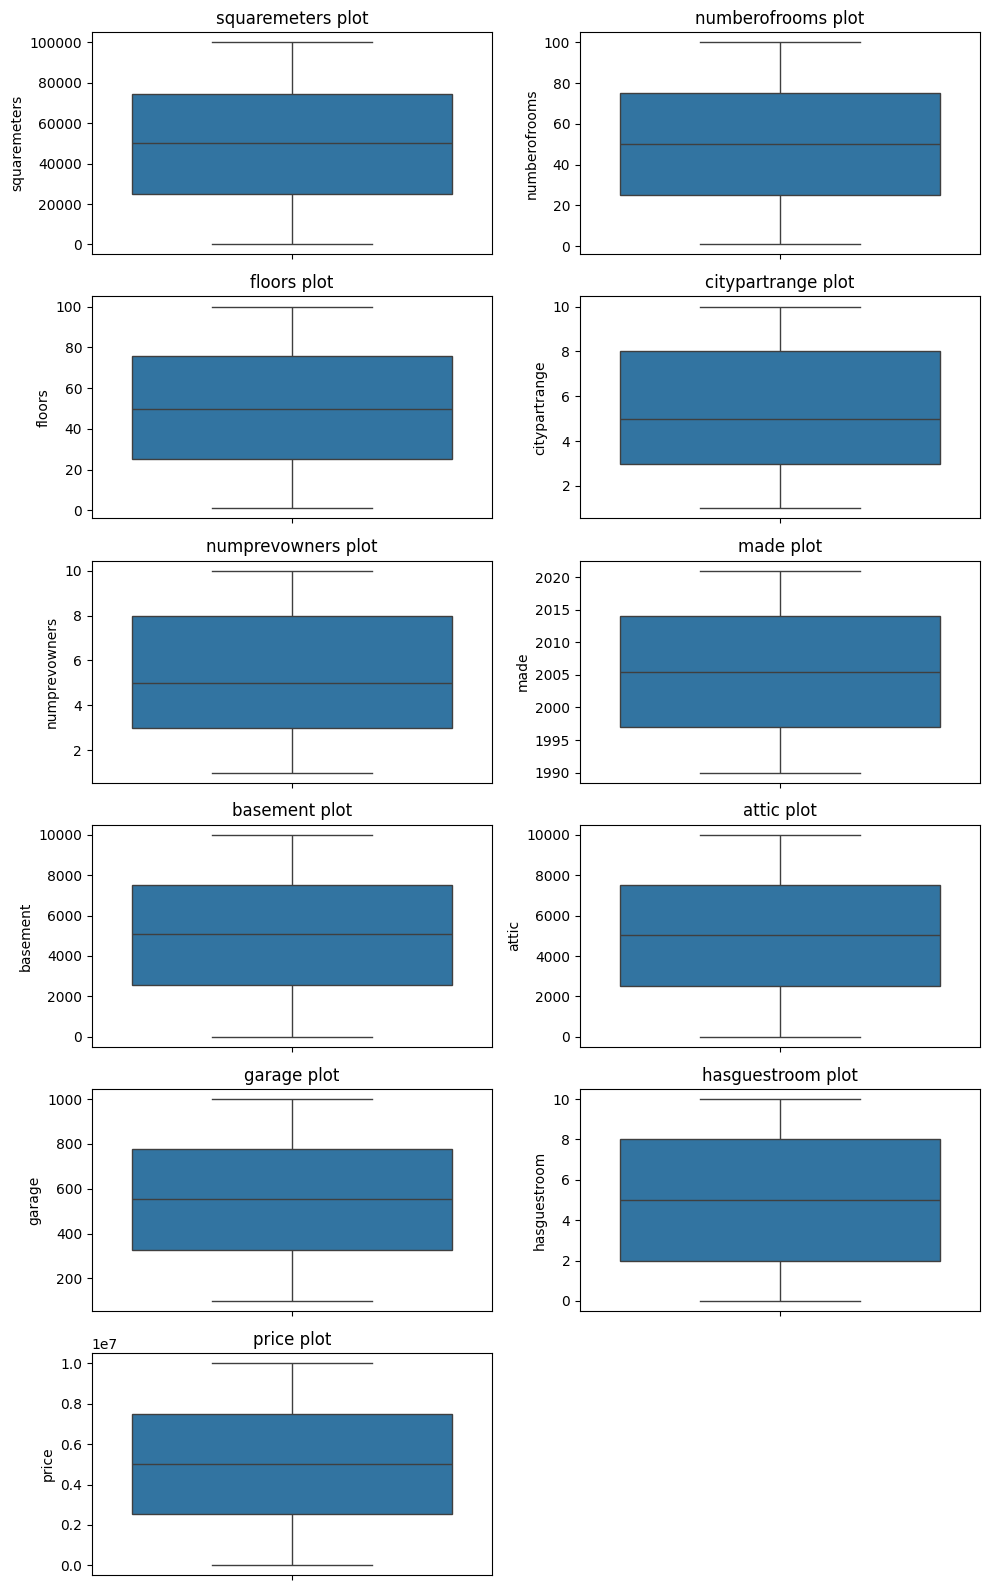

In [17]:
fig, ax = plt.subplots(6,2, figsize = (10,16))
for pos, i in enumerate(numerical_feature):
    sns.boxplot(data = df, y = i, ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].set_title(f'{i} plot')
for pos in range(11, 6*2):
    fig.delaxes(ax[pos//2, pos%2])
plt.tight_layout()
plt.show()
    
    

In [18]:
#Không có ngoại lai

In [19]:
df.head(3)

,squaremeters,numberofrooms,floors,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category,poolandyard
0,75523,3,63,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,80771,39,98,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,55712,58,19,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard


## 2.2.Categorical_feature

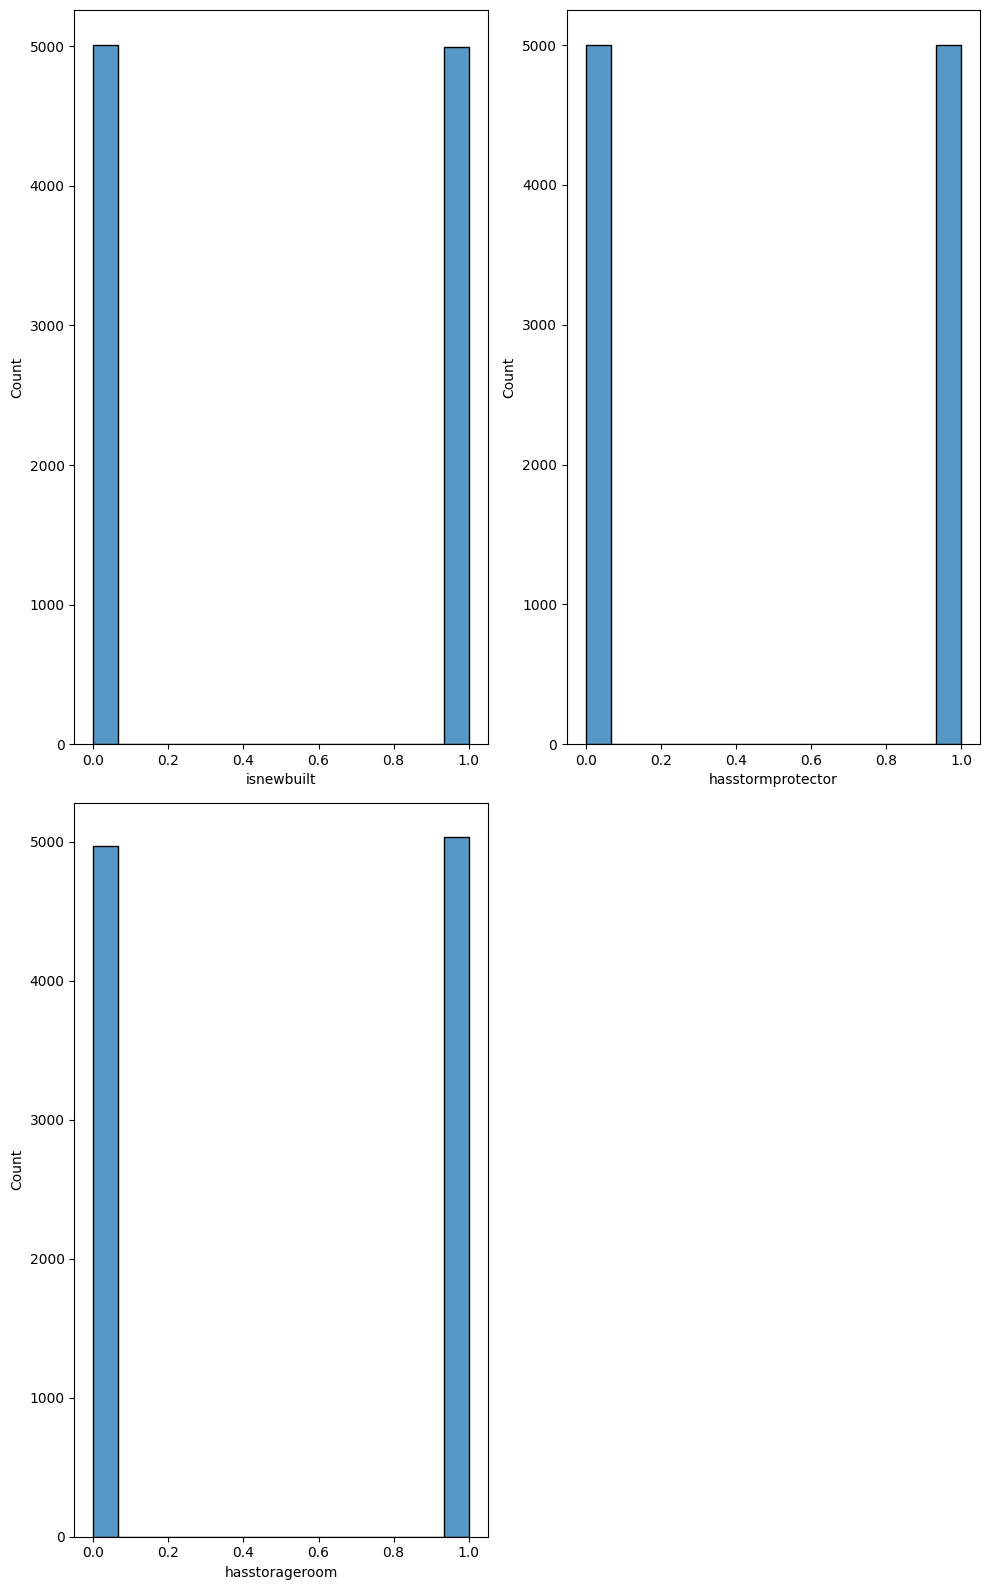

In [20]:
le = LabelEncoder()
for i in ['isnewbuilt', 'hasstormprotector', 'hasstorageroom']:
    df[i] = le.fit_transform(df[i])
df.head(3)
bool_ = ['isnewbuilt', 'hasstormprotector', 'hasstorageroom']
fig, ax = plt.subplots(2,2, figsize = (10,16))
for pos,i in enumerate(bool_):
    sns.histplot(df, x = i, ax = ax[pos//2, pos%2])
for pos in range(3, 2*2):
    fig.delaxes(ax[pos//2, pos%2])

plt.tight_layout()
plt.show()

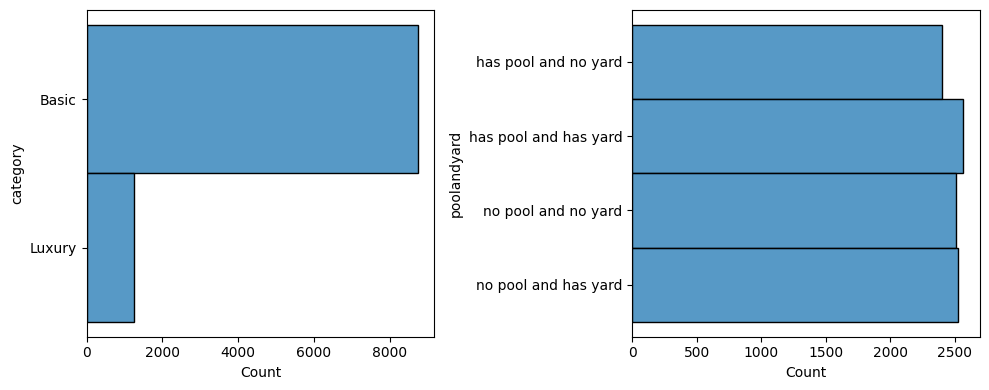

<Axes: xlabel='price'>

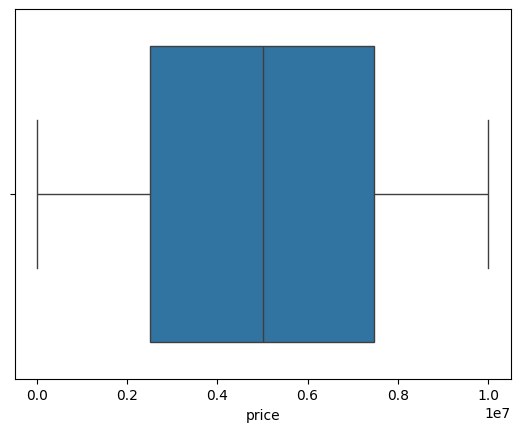

In [21]:
categorical_feature = df.select_dtypes(include = [object]).columns.tolist()
categorical_feature
fig, ax = plt.subplots(1,2, figsize = (10,4))
for pos, i in enumerate(categorical_feature):
    sns.histplot(df, y = i, ax = ax[pos])
plt.tight_layout()
plt.show()

## 2.3.Target_feature

sns.boxplot(df, x = 'price')

In [22]:
for i in categorical_feature:
    df[i] = le.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   floors             10000 non-null  int64  
 3   citypartrange      10000 non-null  int64  
 4   numprevowners      10000 non-null  int64  
 5   made               10000 non-null  int64  
 6   isnewbuilt         10000 non-null  int64  
 7   hasstormprotector  10000 non-null  int64  
 8   basement           10000 non-null  int64  
 9   attic              10000 non-null  int64  
 10  garage             10000 non-null  int64  
 11  hasstorageroom     10000 non-null  int64  
 12  hasguestroom       10000 non-null  int64  
 13  price              10000 non-null  float64
 14  category           10000 non-null  int32  
 15  poolandyard        10000 non-null  int32  
dtypes: float64(1), int32(2)

<Axes: >

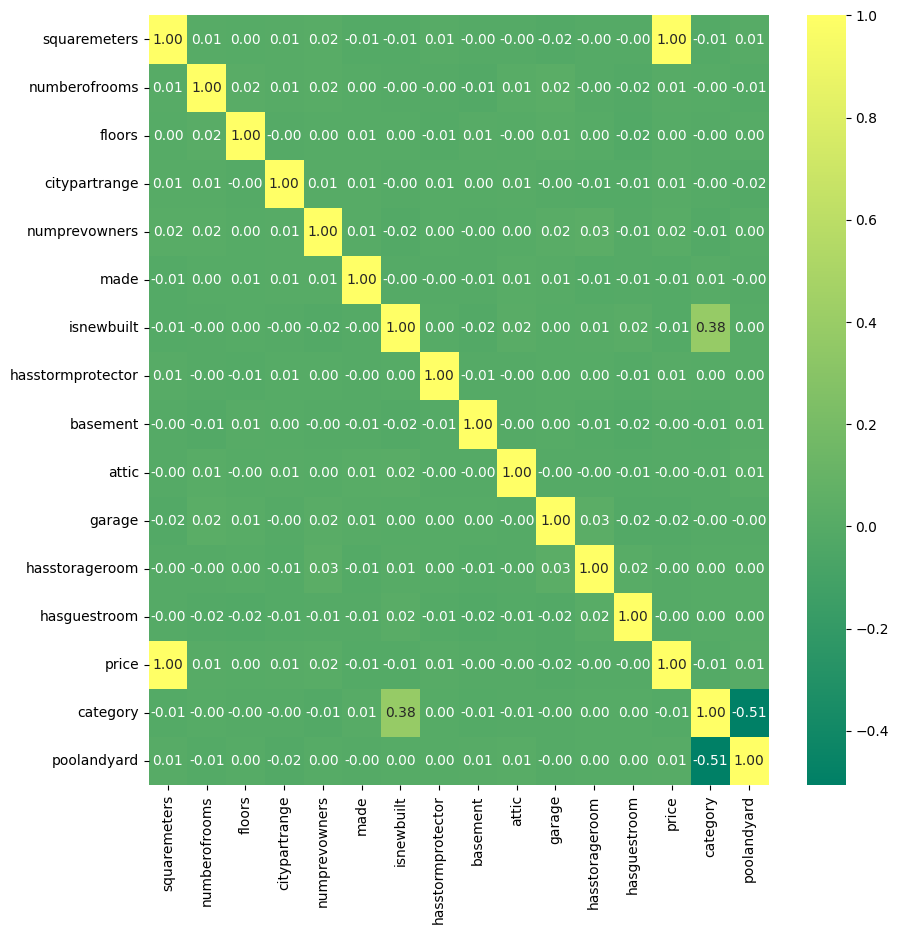

In [23]:
df_corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(df_corr, annot = True, cmap ='summer', fmt = '.2f')

In [24]:
#diện tích và giá nhà có mối tương quan 100%
#categorical và poolandyard có tương quan âm

# III. Exploratory data analyst

<Axes: xlabel='squaremeters', ylabel='price'>

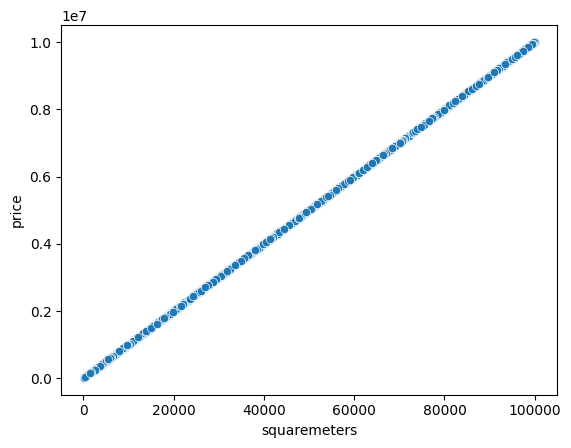

In [25]:
sns.scatterplot(df, x = 'squaremeters', y = 'price')

In [26]:
df

,squaremeters,numberofrooms,floors,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category,poolandyard
0,75523,3,63,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0,1
1,80771,39,98,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1,0
2,55712,58,19,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0,1
3,32316,47,6,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0,3
4,70429,19,90,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,5,7,6,2009,0,1,9311,1698,218,0,4,176425.9,0,1
9996,44403,29,12,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,0,0
9997,83841,3,69,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,0,3
9998,59036,70,96,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,0,3


# IV. Fearure Selection

## 4.1.Logistic Regression

In [27]:
x = df[['squaremeters', 'category','poolandyard']]
y = df[['price']]

In [28]:
x = sm.add_constant(x)

In [29]:
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.213e+09
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:50:44   Log-Likelihood:                -92662.
No. Observations:               10000   AIC:                         1.853e+05
Df Residuals:                    9996   BIC:                         1.854e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8935.2889     69.038    129.426   

#### 
Const - Constant

t is large, indicating that the constant is statistically significant

A small P ~ 0 indicates that the constant coefficient is statistically significant

95% confidence interval for the constant coefficient, indicating the true value is between 8799 and 9097

squaremeters - area

Each time the area increases by 1, the house value is expected to increase by $100

A large t indicates that the coefficient is statistically significant

small standard deviation

P ~ 0 indicates that the coefficient is statistically significant

category - amenities

The standard deviation is quite large. However, each time the category increases by 1, the price increases to $523.

Large standard deviation: 89.

P ~ 0 is statistically significant

poolandyard - swimming pool, garden

reduces prices related to swimming pools and gardens

## 4.2.KMean


In [30]:
df

,squaremeters,numberofrooms,floors,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category,poolandyard
0,75523,3,63,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0,1
1,80771,39,98,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1,0
2,55712,58,19,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0,1
3,32316,47,6,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0,3
4,70429,19,90,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,5,7,6,2009,0,1,9311,1698,218,0,4,176425.9,0,1
9996,44403,29,12,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,0,0
9997,83841,3,69,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,0,3
9998,59036,70,96,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,0,3


In [33]:
x = df[['squaremeters','price']].values

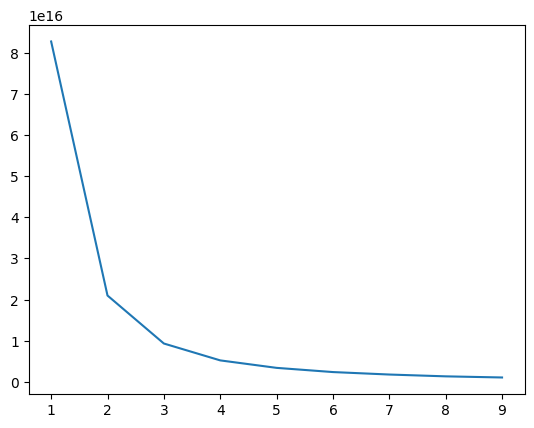

In [35]:
#Building model
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)

In [37]:
k = 5
kmean_model = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
y_kmeans = kmean_model.fit_predict(x)

In [38]:
df['group'] = y_kmeans

In [40]:
df[df['group']==1]

,squaremeters,numberofrooms,floors,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category,poolandyard,group
0,75523,3,63,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0,1,1
4,70429,19,90,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1,0,1
15,75985,60,67,6,9,2009,1,1,4878,281,384,1,5,7607322.9,0,2,1
16,64169,88,6,3,9,2011,1,1,3054,129,726,0,9,6420823.1,0,1,1
34,76485,47,9,2,9,2008,1,0,2860,3129,982,0,1,7653300.8,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,68399,39,46,10,4,2011,0,0,7646,5209,881,0,1,6851767.1,0,0,1
9971,75387,45,89,10,3,2008,0,1,850,8502,890,1,0,7547628.8,0,0,1
9977,74701,98,3,10,3,2001,1,0,3086,4928,839,0,4,7474987.1,0,1,1
9979,77226,65,88,7,6,2006,1,0,8482,9686,506,1,0,7730743.6,0,2,1


In [42]:
centers = kmeans.cluster_centers_


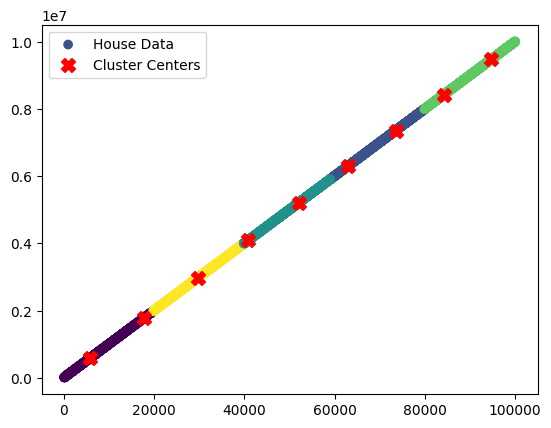

In [44]:
plt.scatter(df['squaremeters'],df['price'], c= df['group'], cmap = 'viridis',label='House Data')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
plt.legend()